In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/Zomato-data-.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/zomato-dataset/Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

## Overall data analysis

In [4]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
df["name"].nunique()##so there are less of repeating restuarents

145

In [7]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# *Univariate Analysis*

### **Types of restuarent**

Text(0, 0.5, 'Votes')

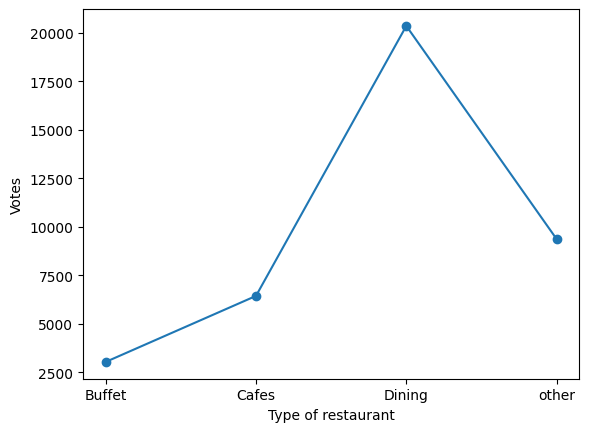

In [8]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, marker = 'o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [9]:
max_votes = df['votes'].max()
min_votes = df['votes'].min()

restaurants_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
num_restaurants_with_max_votes = restaurants_with_max_votes.count()

restaurants_with_min_votes = df.loc[df['votes'] == min_votes, 'name']
num_restaurants_with_min_votes = restaurants_with_min_votes.count()

print(f"Max Votes: {max_votes}")
print(f"Restaurants with Max Votes ({num_restaurants_with_max_votes}): {list(restaurants_with_max_votes)}")

print(f"Min Votes: {min_votes}")
print(f"Restaurants with Min Votes ({num_restaurants_with_min_votes}): {list(restaurants_with_min_votes)}")


Max Votes: 4884
Restaurants with Max Votes (1): ['Empire Restaurant']
Min Votes: 0
Restaurants with Min Votes (33): ['Spicy Tandoor', 'Om Sri Vinayaka Chats', 'Chill Out', 'Me And My Cake', 'Sunsadm', 'Annapooraneshwari Mess', 'Coffee Shopee', 'Hari Super Sandwich', 'Dharwad Line Bazaar Mishra Pedha', 'Cake Bite', "Aarush's Food Plaza", 'Wood Stove', 'Kulfi & More', 'Kannadigas Karavali', 'Soms Kitchen & Bakes', 'Banashankari Nati Style', 'Mohitesh Hut Roll', 'Sri Basaveshwar Jolada Rotti Oota', 'Roll Magic Fast Food', 'Foodlieious Multi Cuisine', 'Thanishka Nati And Karavali Style', 'Swathi Cool Point', 'Kaumudis Juoice', 'Amma - Manae', 'Sri Sai Tiffannies', 'Hotel Andhra Speices', 'Sri Murari Family Restaurant', 'Aramane Donne Biriyani', 'Darkolates', 'Swaada Healthy Kitchen', 'Gawdaru Mane Beriyani', 'Melting Melodies', 'New Indraprasta']


### Concludes that there are so many restaurents which are not voted at all, so the variety is discouraged.

<Axes: xlabel='online_order', ylabel='count'>

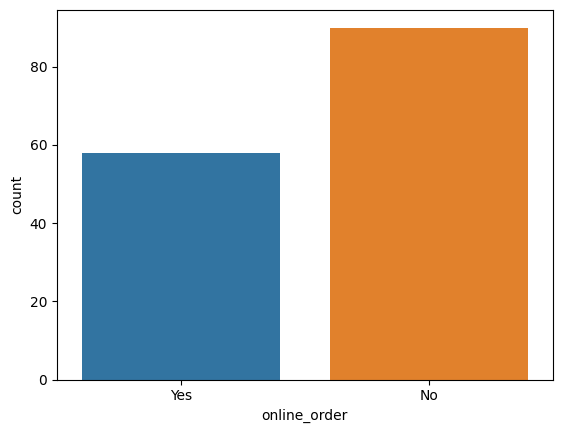

In [10]:
sns.countplot(x = df['online_order'])

### There are more of restaurent based service then online delivery.

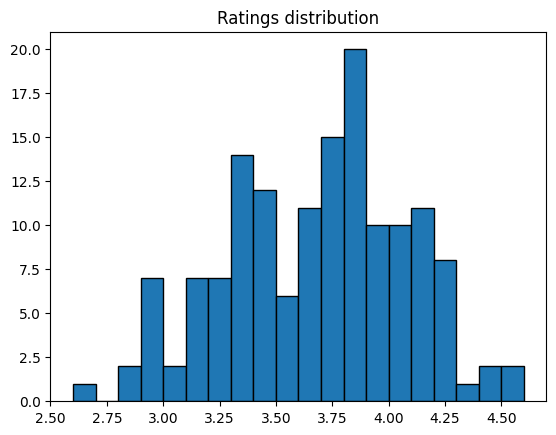

In [11]:
plt.hist(df['rate'], bins = 20,edgecolor='black')
plt.title('Ratings distribution')
plt.show()

### Most of the restaurents are rated 3.5 and above.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

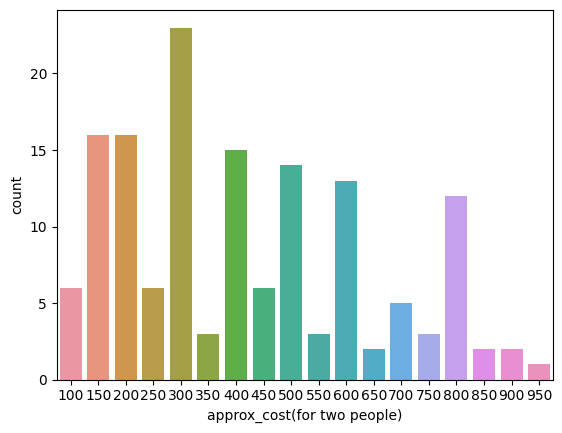

In [12]:
sns.countplot(x = df['approx_cost(for two people)'])

### The approx cost is very variable but has a mean of 300 range.

<Axes: xlabel='book_table', ylabel='count'>

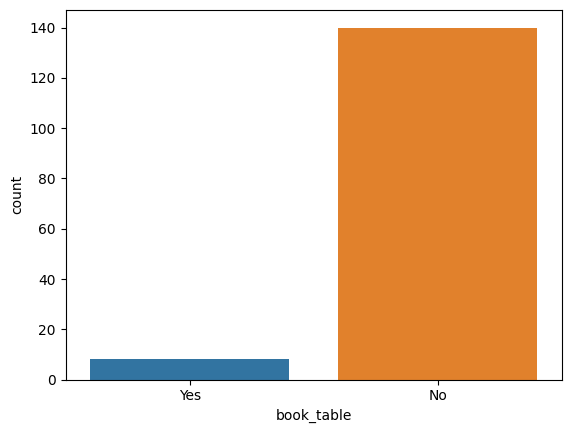

In [13]:
sns.countplot(x = df['book_table'])

### The people are not interested in booking tables from zomato website.

# *Multvariate Analysis*

### Preprocessing for the Coorelation

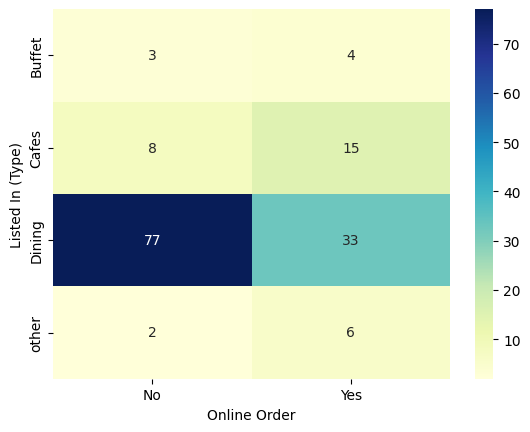

In [14]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap = 'YlGnBu', fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

In [15]:
df.drop(columns=['name'], inplace=True)

# Convert 'online_order' and 'book_table' to binary (0 for 'No', 1 for 'Yes')
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Convert 'listed_in(type)' to categorical numerical labels (0, 1, 2)
df['listed_in(type)'] = df['listed_in(type)'].astype('category').cat.codes

# Display processed DataFrame
print(df)

     online_order  book_table  rate  votes  approx_cost(for two people)  \
0               1           1   4.1    775                          800   
1               1           0   4.1    787                          800   
2               1           0   3.8    918                          800   
3               0           0   3.7     88                          300   
4               0           0   3.8    166                          600   
..            ...         ...   ...    ...                          ...   
143             0           0   3.3      0                          100   
144             0           0   3.3      0                          150   
145             1           0   4.0    771                          450   
146             0           0   3.0     98                          800   
147             1           0   3.9     47                          200   

     listed_in(type)  
0                  0  
1                  0  
2                  0  
3      

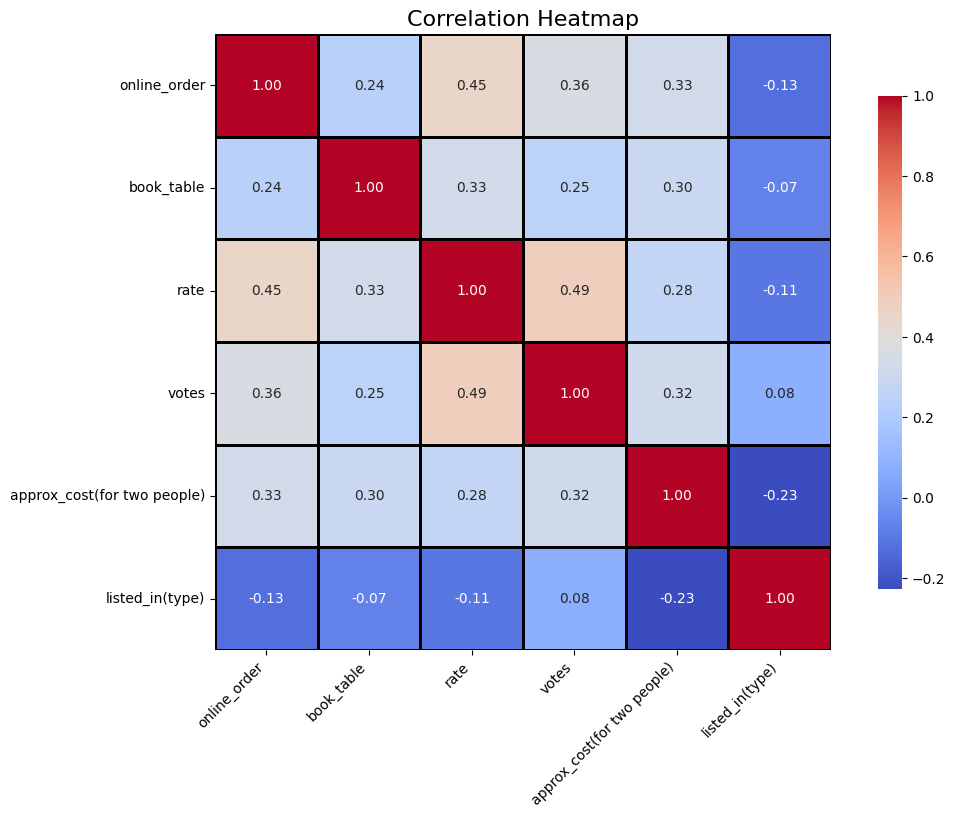

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))  # Increase figure size for better clarity
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=2, 
            linecolor='black', square=True, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

# Rotate axis labels for readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


### From the above data we can clearly see that there is a huge correlation between *the rate and online orders*, *rate and votes*, *online order and people*  so let's analyse them.

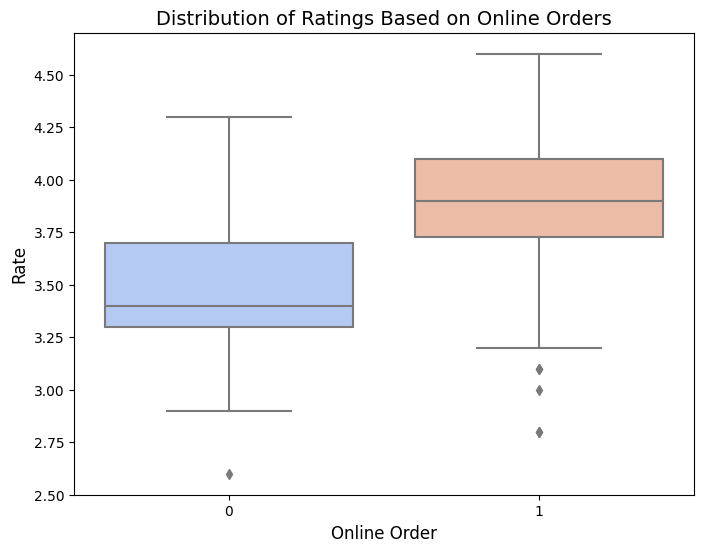

Mean Difference: 0.37


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x=df["online_order"], y=df["rate"], palette="coolwarm")

plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Rate", fontsize=12)
plt.title("Distribution of Ratings Based on Online Orders", fontsize=14)
plt.show()
mean_values = df.groupby("online_order")["rate"].mean()
mean_diff = abs(mean_values[1] - mean_values[0]) 
print(f"Mean Difference: {mean_diff:.2f}")



### **From this we can clearly see that they take online orders more from the highly rated restaurents and they refer by half the ratings**

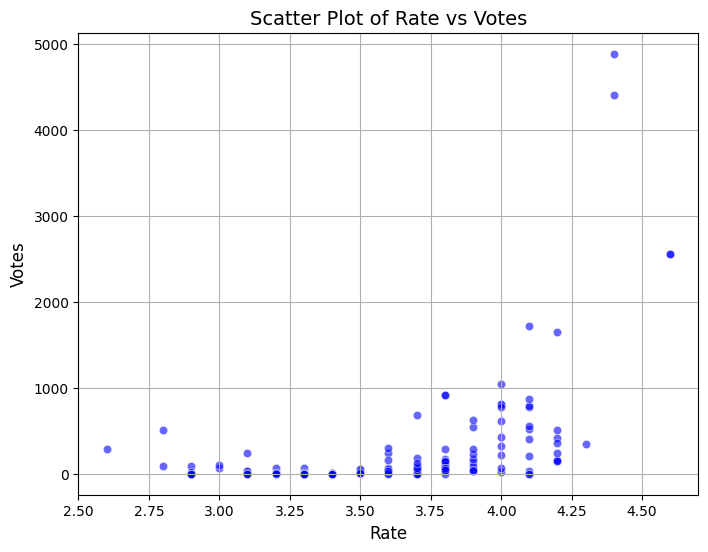

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x=df["rate"], y=df["votes"], alpha=0.6, color="blue")

plt.xlabel("Rate", fontsize=12)
plt.ylabel("Votes", fontsize=12)
plt.title("Scatter Plot of Rate vs Votes", fontsize=14)
plt.grid(True)
plt.show()


**The higher rated plot have more votes then the lower rated plot.**

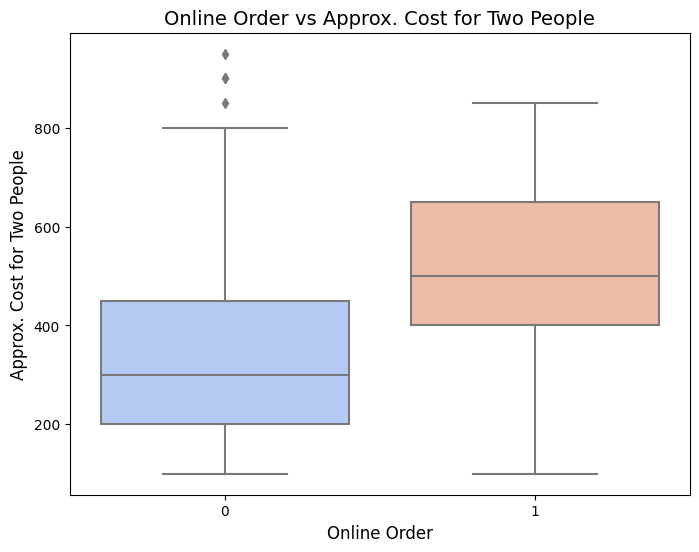

Mean Difference: ₹151.46


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  
sns.boxplot(x=df["online_order"], y=df["approx_cost(for two people)"], palette="coolwarm")

plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Approx. Cost for Two People", fontsize=12)
plt.title("Online Order vs Approx. Cost for Two People", fontsize=14)
plt.show()
mean_values = df.groupby("online_order")["approx_cost(for two people)"].mean()
mean_diff = abs(mean_values[1] - mean_values[0]) 
print(f"Mean Difference: ₹{mean_diff:.2f}")


### The rates for two people food cost is higher and differs by 151 rupees which defines the avg delivery charges